# Data Understanding parte due

In [27]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [28]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

## Missing values

### popularity_confidence

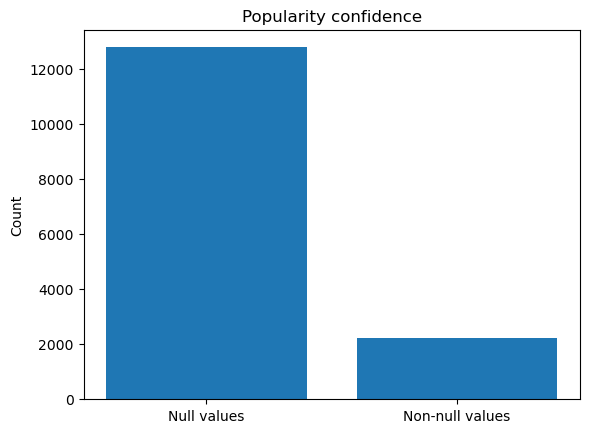

In [29]:
missing_values_pop_conf=df['popularity_confidence'].isnull().sum()
data=df['popularity_confidence'].shape[0]
non_null=data-missing_values_pop_conf
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_pop_conf,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Popularity confidence')

plt.show()

### mode

In [30]:
mode_values=df["mode"].unique()
print(mode_values)

[ 1.  0. nan]


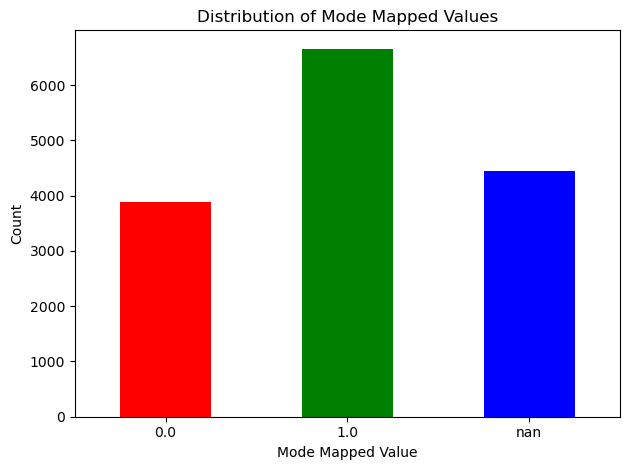

In [36]:
df['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 

In [31]:
correlations = df.corr(method="pearson")
print(correlations["mode"])

duration_ms             -0.023310
explicit                -0.042846
popularity               0.073043
danceability            -0.072422
energy                  -0.079969
key                     -0.157515
loudness                -0.033544
mode                     1.000000
speechiness             -0.064289
acousticness             0.085246
instrumentalness        -0.080035
liveness                 0.015738
valence                 -0.006907
tempo                   -0.013001
features_duration_ms    -0.023409
time_signature          -0.019378
n_beats                 -0.030685
n_bars                  -0.027687
popularity_confidence    0.003698
processing               0.261129
Name: mode, dtype: float64


In [32]:
df.groupby('genre')[['mode']].mean()

,mode
genre,
afrobeat,0.559322
black-metal,0.571977
bluegrass,0.833962
brazil,0.672381
breakbeat,0.587477
chicago-house,0.514440
disney,0.752363
forro,0.658349
happy,0.631179


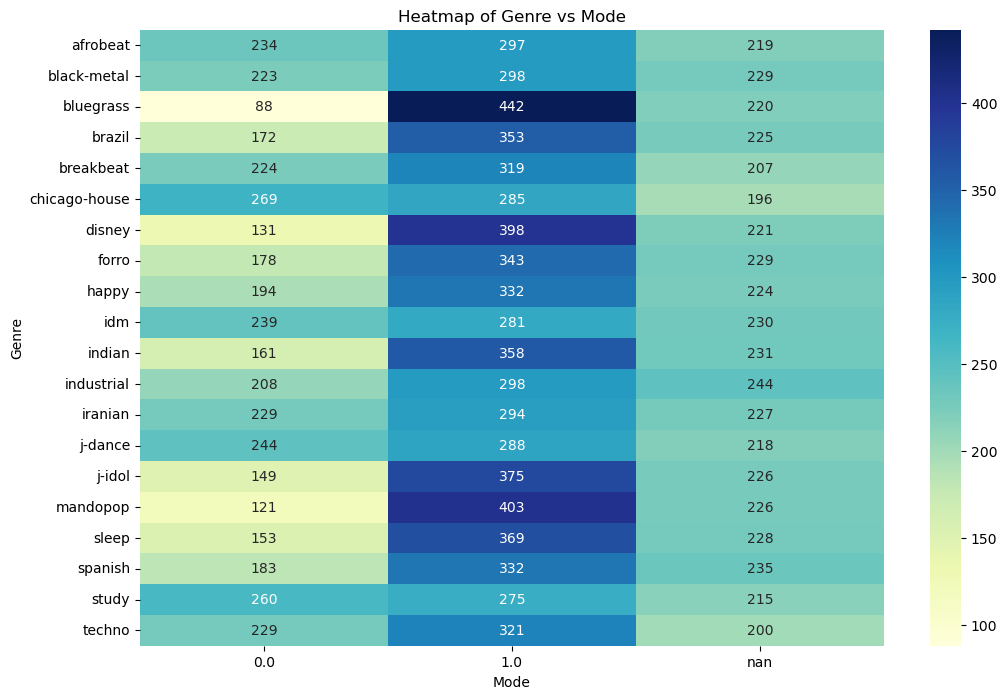

In [33]:
df['mode'] = df['mode'].astype(str)

contingency_table = pd.crosstab(df['genre'], df['mode'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of Genre vs Mode')
plt.xlabel('Mode')
plt.ylabel('Genre')
plt.show()

In [34]:
df["mode"].mode()[0]

'1.0'

### time_signature

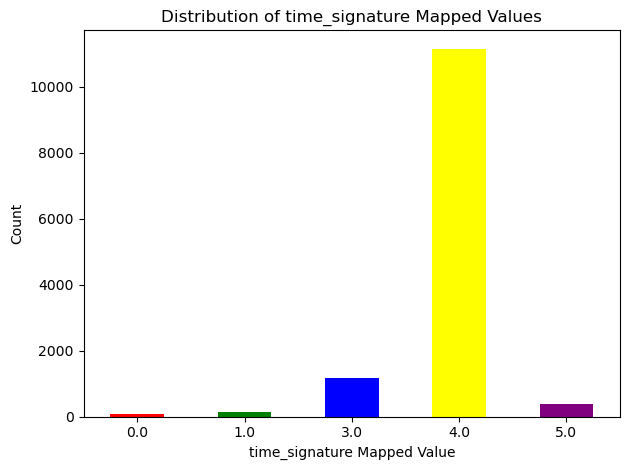

[ 4. nan  3.  5.  1.  0.]


In [39]:
df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
correlation_with_time_signature = df.corrwith(df['time_signature'])
correlation_df = pd.DataFrame(correlation_with_time_signature, columns=['Correlation'])
correlation_df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,Correlation
duration_ms,0.009033
explicit,0.051260
popularity,-0.003160
danceability,0.292167
energy,0.204646
key,0.028388
loudness,0.250568
speechiness,0.080739
acousticness,-0.139706
instrumentalness,-0.123982


In [50]:
df['time_signature'].mode()[0]

4.0

## Gestione data quality

In [117]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
rows_with_time_zero = df[df['acousticness']>0.9]
rows_with_time_zero[rows_with_time_zero['energy']>0.9][["name", "genre","acousticness","energy","loudness"]]

,name,genre,acousticness,energy,loudness
169,Calm,sleep,0.943,1.000,-24.878
224,Serene Rain,sleep,0.933,1.000,-22.526
1089,Easing Peal,sleep,0.932,0.996,-18.338
1736,Non Abrasive,sleep,0.929,0.996,-18.420
3024,Womb With Forest Sounds and No Heartbeat (No F...,sleep,0.949,0.910,-21.289
3067,Modest Vibe,sleep,0.935,0.997,-18.346
3984,Comforting Noise,sleep,0.935,0.996,-18.774
4130,Rain Sounds: Sleep Rain on Car Hood - Loopable,sleep,0.987,0.998,-13.265
4629,"Rain Noise, Ambient Sounds - 1",sleep,0.986,0.998,-26.133
4668,Zen Rain,sleep,0.947,1.000,-21.916


Text(0.5, 1.0, 'acousticness sleep Histogram')

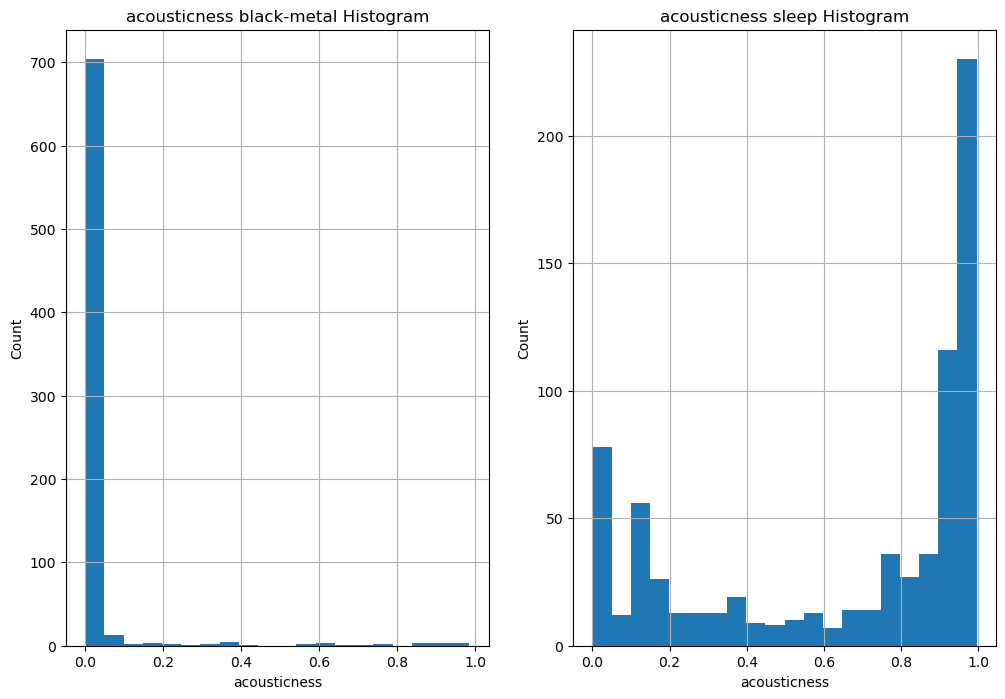

In [120]:

fig = plt.figure(figsize=(12, 8)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
rows_black_metal = df[df['genre']=="black-metal"]
rows_black_metal['acousticness'].hist(bins=20)
plt.xlabel('acousticness')
plt.ylabel('Count')
plt.title('acousticness black-metal Histogram')

plt.subplot2grid(fig_dims, (0, 1))
rows_sleep = df[df['genre']=="sleep"]
rows_sleep['acousticness'].hist(bins=20)
plt.xlabel('acousticness')
plt.ylabel('Count')
plt.title('acousticness sleep Histogram')

Questi generi sembrano scambiati

Errore nei dati: Potrebbe esserci un errore nei dati, e i valori di acousticness potrebbero non essere stati registrati correttamente o mancare del tutto per le canzoni.

Classificazione errata: Le canzoni potrebbero essere state erroneamente classificate come black metal quando in realtà non lo sono. Ciò potrebbe influire sui valori di acousticness.

Stile specifico: Il black metal è un genere molto diversificato con molte sottocategorie. Alcune sottocategorie potrebbero fare un uso più ampio di strumenti acustici rispetto ad altre. Potrebbe essere necessario considerare quale sottocategoria specifica di black metal stai analizzando.

Campione limitato: Se il tuo campione di canzoni è molto limitato o non rappresentativo del genere black metal nel suo insieme, potrebbe non riflettere accuratamente la variabilità all'interno del genere.

Ho anche cercato le canzoni online, non hanno acousctiness 0 è impossibile

I valori in tempo uguali a 0 sono strani

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
rows_with_time_zero = df[df['tempo']==0]
rows_with_time_zero[["name", "genre","tempo","n_bars","n_beats","energy", "loudness", "valence"]]

,name,genre,tempo,n_bars,n_beats,energy,loudness,valence
267,Hair Dryer Sound 20 - Loopable With No Fade,sleep,0.0,0.0,0.0,0.000030,-22.367,0.0
664,Brown Noise with Binaural Beats - Theta - Loop...,sleep,0.0,0.0,0.0,0.475000,-21.019,0.0
727,Outside Air Unit 2,sleep,0.0,0.0,0.0,0.000262,-16.680,0.0
865,Weißes Rauschen: Rem-Schlaf,sleep,0.0,0.0,0.0,0.000164,-23.108,0.0
944,Continuous Rain,sleep,0.0,0.0,0.0,0.998000,-25.885,0.0
1153,Ich muss jetzt schlafen,sleep,0.0,0.0,0.0,0.401000,-17.403,0.0
1211,V-4,iranian,0.0,0.0,0.0,0.224000,-22.196,0.0
1259,Spray Paint,sleep,0.0,0.0,0.0,0.183000,-38.574,0.0
1328,Loopable Pink Noise Flowing Waters,sleep,0.0,0.0,0.0,0.000660,-25.141,0.0
1501,Plastic Hair Dryer - Stationary,sleep,0.0,0.0,0.0,0.657000,-8.158,0.0


In [ ]:
plt.scatter(df['tempo'], df['n_beats'], alpha=0.5, label='n_beats')
plt.scatter(df['tempo'], df['n_bars'], alpha=0.5, label='n_bars')
plt.xlabel('Feature Duration (ms)')
plt.ylabel('Number of Beats/Bars')
plt.title('Scatter Plot of Feature Duration (ms) vs. Number of Beats and Bars')
plt.legend()

duration_ms (Durata in millisecondi)
Gamma: Da circa 8,586 ms (circa 8.5 secondi) a 4,120,258 ms (oltre 68 minuti).
Media: 246,807 ms (circa 4 minuti e 7 secondi).
Deviazione Standard: 127,994 ms, indicando una variazione significativa nella lunghezza delle tracce.
La distribuzione della durata delle tracce è asimmetrica con una coda lunga verso i valori più alti. Questo attributo è un buon candidato per la normalizzazione, dato che i valori sono su una scala molto ampia e ciò potrebbe influenzare l'analisi.

loudness (Loudness della traccia in decibel)
Gamma: Da -49.53 dB a 3.156 dB.
Media: -8.89 dB.
Deviazione Standard: 6 dB.
La distribuzione del loudness mostra una concentrazione di valori su un intervallo relativamente stretto, ma con alcuni valori che si spingono verso l'estremo inferiore del range. Questo attributo potrebbe beneficiare della normalizzazione, in particolare per modelli di machine learning che presuppongono dati su scale simili.

tempo (Tempo della traccia in battiti per minuto)
Gamma: Da 0 bpm (probabilmente valori mancanti o errati) a 220.525 bpm.
Media: 123 bpm.
Deviazione Standard: 31.93 bpm.
Il tempo ha una distribuzione più simmetrica rispetto alla durata e al loudness, con la maggior parte dei valori concentrati intorno alla media. Tuttavia, il valore zero è sospetto e potrebbe necessitare di ulteriore analisi o di una correzione.

popularity (Popolarità della traccia)
Gamma: Da 0 a 94.
Media: 27.42.
Deviazione Standard: 18.59.
La popolarità ha una distribuzione che potrebbe essere discretizzata in bin come "bassa", "media" e "alta" per semplificare l'analisi o per l'uso in modelli di classificazione.

Per procedere, potremmo normalizzare duration_ms, loudness, e tempo utilizzando una scalatura Min-Max o standardizzazione Z-score. Potremmo anche discretizzare popularity in categorie basate sui quartili o su soglie specifiche. E infine, qualsiasi attributo categorico con più di due categorie potrebbe essere trasformato in variabili dummy (binarizzazione) per l'uso in modelli di regressione o classificazione.

## Quindi siccome ci sono tante canzoni poco popolari e poche popolari potremmo discretizzare in basse media alta per dare più peso a quelle canzoni, o anche in numero cioè da 0 a 5 bo
## Duration potrebbe essere normalizzato per simile ragione
## Tempo ha valori 0 strani esplorati un po sopra
## loudness sempre normalizzare
## Probabilemnte alcune canzoni black metal esleep sono sminchiate

Altre cose notate:

- valence è collegate negativamente con acousticness perchè ovviamente se c'è il pubblico lo sono meno, e infatti è collegata positivamente con energy e tanto con danceability
- time signature è collegato positivamente con tempo, energy, danceability e loudness che oltretutto questi ultimi 3 sono pure collegati 